In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('Station_NY.csv')

In [3]:
print(data.head())

    ID Fuel Type Code                               Station Name      City  \
0  108            CNG  Clean Energy - Greenpoint - National Grid  Brooklyn   
1  112            CNG                   Canarsie - National Grid  Brooklyn   
2  124            CNG      Con Edison - W 29th St Service Center  New York   
3  125            CNG      Con Edison - E 16th St Service Center  New York   
4  129            CNG       Con Edison - Van Nest Service Center     Bronx   

  State  EV Level1 EVSE Num  EV Level2 EVSE Num  EV DC Fast Count EV Network  \
0    NY                 NaN                 NaN               NaN        NaN   
1    NY                 NaN                 NaN               NaN        NaN   
2    NY                 NaN                 NaN               NaN        NaN   
3    NY                 NaN                 NaN               NaN        NaN   
4    NY                 NaN                 NaN               NaN        NaN   

  Geocode Status   Latitude  Longitude NG Vehicle 

In [4]:
print(data.describe())

                  ID  EV Level1 EVSE Num  EV Level2 EVSE Num  \
count    3409.000000            5.000000         3024.000000   
mean   157128.277501            1.200000            2.560185   
std     47156.326395            0.447214            2.165578   
min       108.000000            1.000000            1.000000   
25%    122897.000000            1.000000            2.000000   
50%    165397.000000            1.000000            2.000000   
75%    190218.000000            1.000000            3.000000   
max    224368.000000            2.000000           60.000000   

       EV DC Fast Count     Latitude    Longitude  CNG Dispenser Num  \
count        241.000000  3409.000000  3409.000000          38.000000   
mean           4.248963    42.088979   -74.782017           2.605263   
std            4.101353     1.096607     2.190026           6.275389   
min            1.000000    39.031984   -84.467409           1.000000   
25%            1.000000    40.809865   -75.892293           1.0

In [5]:
#Calculo descriptivas
print(data.describe(include=['object']))

       Fuel Type Code         Station Name      City State  \
count            3409                 3409      3409  3409   
unique              6                 3237       598     1   
top              ELEC  NYSE Thruway - NYPA  New York    NY   
freq             3235                   12       381  3409   

                 EV Network Geocode Status NG Vehicle Class  \
count                  3235           3409               58   
unique                   19              4                3   
top     ChargePoint Network            GPS               HD   
freq                   1627           2529               37   

       EV Connector Types Groups With Access Code (French)  \
count                3235                             3409   
unique                 11                               15   
top                 J1772                           Public   
freq                 2517                             2931   

        Access Detail Code CNG Vehicle Class  
count          

In [6]:
for column in data.select_dtypes(include=['object']).columns:
    print(column, data[column].unique())

Fuel Type Code ['CNG' 'LPG' 'BD' 'E85' 'ELEC' 'HY']
Station Name ['Clean Energy - Greenpoint - National Grid' 'Canarsie - National Grid'
 'Con Edison - W 29th St Service Center' ... 'G & M REALTY 2 STATION 1'
 '40 N 4th St Apartments' 'EVolveNY Salamanca']
City ['Brooklyn' 'New York' 'Bronx' 'Rye' 'Queens' 'Brentwood' 'Hicksville'
 'Menands' 'Garden City' 'Monticello' 'Buffalo' 'Riverhead'
 'Valley Stream' 'Rochester' 'Oyster Bay' 'Troy' 'Flushing'
 'Niagara Falls' 'Massapequa' 'Schenectady' 'Irvington' 'Lindenhurst'
 'Trumansburg' 'Albany' 'Bedford Hills' 'Syracuse' 'Newburgh' 'Larchmont'
 'West Nyack' 'Croton-on-Hudson' 'Point Lookout' 'Wyandanch' 'Yaphank'
 'Calverton' 'Congers' 'Water Mill' 'Kings Park' 'Commack' 'Glenmont'
 'Melville' 'Southfields' 'Patchogue' 'Rockville Centre' 'Rocky Point'
 'Bridgehampton' 'Islandia' 'Eastport' 'Farmingville' 'Bellmore'
 'Greenlawn' 'Mt. Sinai' 'Selden' 'New Hyde Park' 'New Rochelle'
 'Westfield' 'East Northport' 'Fort Edward' 'Geneva' 'Oneonta

In [7]:
#Verifico nulos
print(data.isnull().sum())

ID                                     0
Fuel Type Code                         0
Station Name                           0
City                                   0
State                                  0
EV Level1 EVSE Num                  3404
EV Level2 EVSE Num                   385
EV DC Fast Count                    3168
EV Network                           174
Geocode Status                         0
Latitude                               0
Longitude                              0
NG Vehicle Class                    3351
EV Connector Types                   174
Groups With Access Code (French)       0
Access Detail Code                  3117
CNG Dispenser Num                   3371
CNG Vehicle Class                   3351
LNG Vehicle Class                   3409
dtype: int64


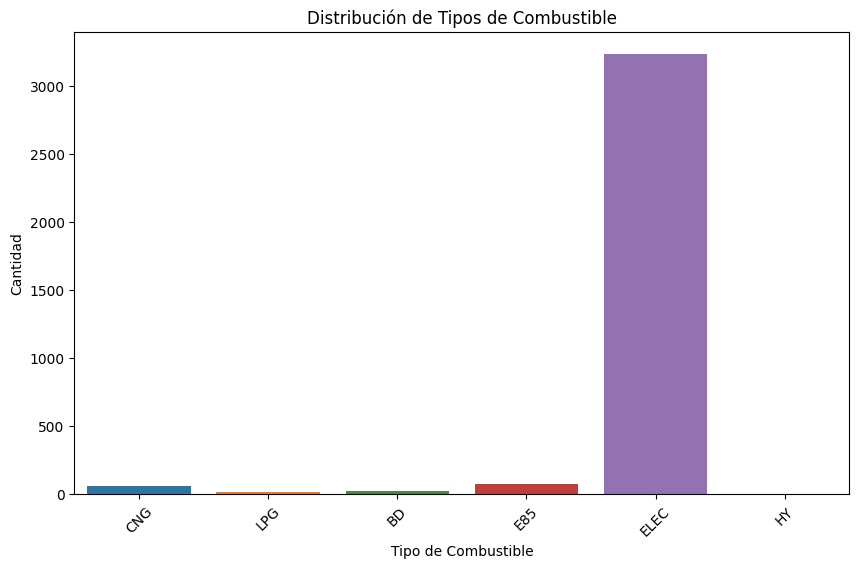

In [8]:
# Gráfico de barras de tipos de combustible
# Se observa en la distribución de los tipos de combustibles que la gran mayoria de los automovilies son electricos.
plt.figure(figsize=(10, 6))
sns.countplot(x='Fuel Type Code', data=data)
plt.title('Distribución de Tipos de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

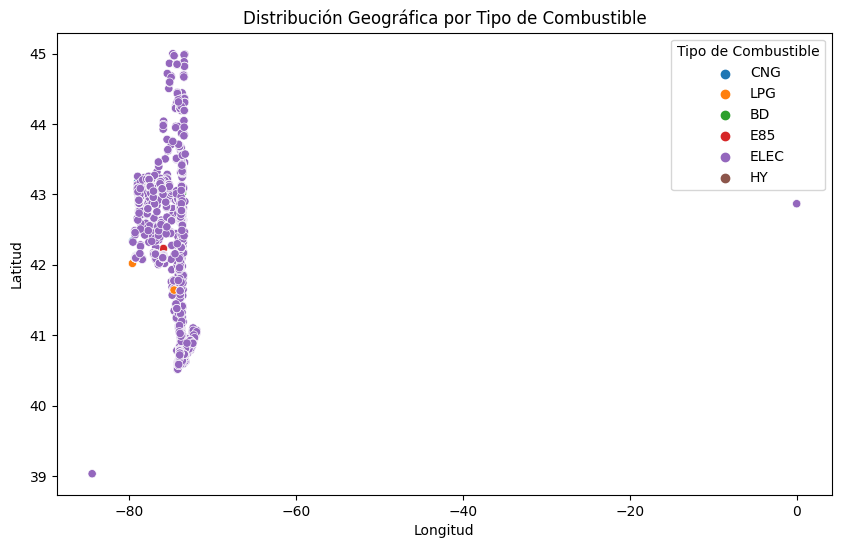

In [9]:
# Gráfico de dispersión entre la latitud y la longitud
# Se observa la disribución geográfica por tipo de combustible. Se observa que la gran mayoría de los tipos es eléctrico.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=data, hue='Fuel Type Code')
plt.title('Distribución Geográfica por Tipo de Combustible')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Tipo de Combustible')
plt.show()

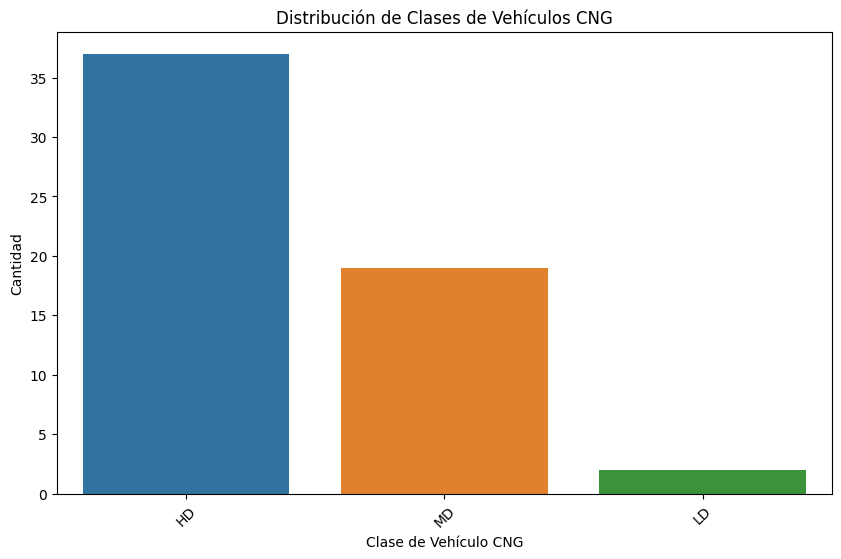

In [14]:
# Gráfico de barras de clases de vehículos CNG
# El gráfico nos muestra como se dstribuyen las clases de vehículos CNG.
plt.figure(figsize=(10, 6))
sns.countplot(x='CNG Vehicle Class', data=data)
plt.title('Distribución de Clases de Vehículos CNG')
plt.xlabel('Clase de Vehículo CNG')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

C:\Users\Lic.Balzarelli\AppData\Local\Temp\ipykernel_14048\3324100022.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


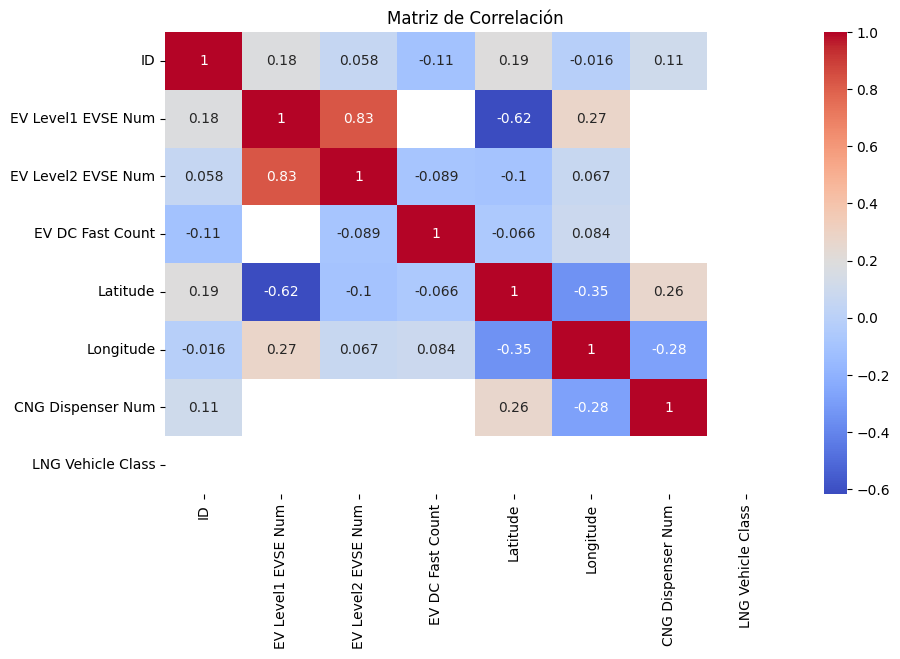

In [15]:
# Matriz de correlación
#Este gráfico nos muestra la relación entre las variables numéricas del dataset. 
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


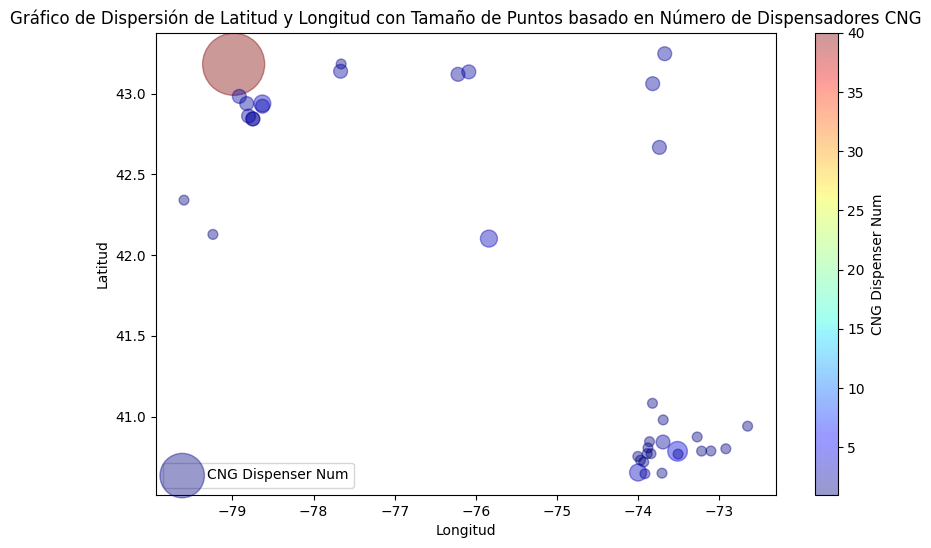

In [16]:
#Gráfico de Dispersión de Latitud y Longitud con Tamaño de Puntos basado en Número de Dispensadores CNG
#Este gráfico nos muestra una visualizacion muy practica. Se observan algunos atributos del dataset usando la información geográfica en los ejes x e y
#como puntos, cuyo tamaño indica la cantidad de dispensers de CNG y el color representa el número de dispensers.
data.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
          s=data["CNG Dispenser Num"] * 50, label="CNG Dispenser Num", figsize=(10, 6),
          c="CNG Dispenser Num", cmap=plt.get_cmap("jet"), colorbar=True,
          sharex=False)
plt.legend()
plt.title('Gráfico de Dispersión de Latitud y Longitud con Tamaño de Puntos basado en Número de Dispensadores CNG')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()
